# PyBer - Homework 5

Erin Cullen

In [1]:
#Import dependencies 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#create a path for our two csv files 
csv_path1 = os.path.join("Raw Data","city_data.csv")
csv_path2 = os.path.join("Raw Data","ride_data.csv")
#Read in the city csv and look at the data frame 
city_data = pd.read_csv(csv_path1)
ride_data = pd.read_csv(csv_path2)

In [15]:
# Group the rider data by the city and calcualte the mean fare per city
group = ride_data.groupby(["city"]).mean().reset_index()

#merge the average fare data on the city data 
merge_city = group.merge(city_data, on ="city")
avg_fare = merge_city.rename(index=str, columns={"fare":"avg fare"})
avg_fare["num rides"] = ride_data["city"].value_counts()
avg_fare = avg_fare.sort_index(by = ["type"])

/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


In [17]:
num_rides = ride_data["city"].value_counts().to_dict()
num_rides = pd.DataFrame.from_dict(num_rides, orient='index').reset_index()
num_rides = num_rides.rename(index=str, columns={"index":"city",0:"num_rides"})

Rural Data

In [6]:
#Rural 
rural_data = city_data.loc[city_data["type"] == "Rural",:]
rural_data = rural_data.merge(avg_fare, on="city")
rural_data = rural_data[["city","driver_count_x","type_x","avg fare"]]
rural_data = rural_data.merge(num_rides, on="city")

#create data points for Rural
rur_drivers = rural_data["driver_count_x"]
rur_rides =rural_data["num_rides"]
rur_fare = rural_data["avg fare"]


Suburban Data

In [7]:
#Suburban
sub_data = city_data.loc[city_data["type"] == "Suburban",:]
sub_data = sub_data.merge(avg_fare, on="city")
sub_data = sub_data[["city","driver_count_x","type_x","avg fare"]]
sub_data = sub_data.merge(num_rides, on="city")

#create data points for Rural
sub_drivers = sub_data["driver_count_x"]
sub_rides =sub_data["num_rides"]
sub_fare = sub_data["avg fare"]

Urban Data

In [8]:
#Suburban
urb_data = city_data.loc[city_data["type"] == "Urban",:]
urb_data = urb_data.merge(avg_fare, on="city")
urb_data = urb_data[["city","driver_count_x","type_x","avg fare"]]
urb_data = urb_data.merge(num_rides, on="city")

#create data points for Rural
urb_drivers = urb_data["driver_count_x"]
urb_rides =urb_data["num_rides"]
urb_fare = urb_data["avg fare"]

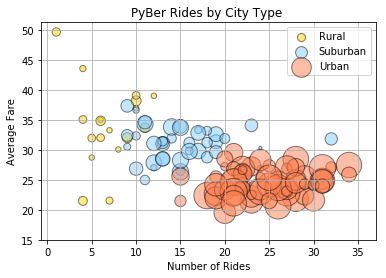

In [9]:
plt.scatter(rur_rides, rur_fare, s=10*rur_drivers, c ="gold", alpha = .50, edgecolors="black")
plt.scatter(sub_rides, sub_fare, s=10*sub_drivers, c="lightskyblue", alpha = .50, edgecolors="black")
plt.scatter(urb_rides, urb_fare, s=10*urb_drivers, c="coral", alpha =.50, edgecolors="black")

plt.xlabel("Number of Rides")
plt.ylabel("Average Fare")
plt.title("PyBer Rides by City Type ")
plt.ylim(15)
plt.grid()
plt.legend(["Rural","Suburban","Urban"])



# Pie Charts

Total Fares by City Type

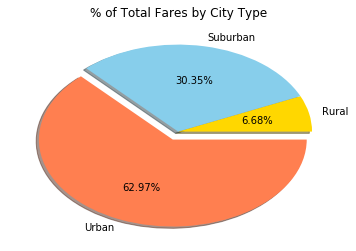

In [13]:
# % of Total Fares by City Type
#rider data by city and calcualte the mean per city
tot_fare = ride_data.groupby(["city"]).sum().reset_index()
tot_fare = tot_fare.merge(city_data, on="city")
tot_fare = tot_fare.groupby(["type"]).sum().reset_index()

labels = tot_fare["type"]
values = tot_fare["fare"]
colors = ["gold","skyblue", "coral"]
explode = [0.1 if x==max(values) else 0 for x in values]

plt.pie(values, labels=labels, explode=explode, colors=colors, shadow=True, autopct="%1.2f%%")
plt.title("% of Total Fares by City Type")
None

Total Drivers By City Type

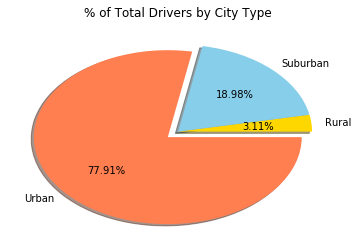

In [11]:
labels = tot_fare["type"]
values = tot_fare["driver_count"]
colors = ["gold","skyblue", "coral"]
explode = [0.1 if x==max(values) else 0 for x in values]

plt.pie(values, labels=labels, explode=explode, colors=colors, shadow=True, autopct="%1.2f%%")
plt.title("% of Total Drivers by City Type")
None

Total Rides by City Type

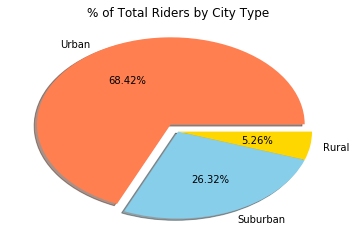

In [12]:
#rider data by city and calcualte the mean per city
tot_rides = ride_data.merge(city_data, on="city")

tot_rides = tot_rides["type"].value_counts()


values = tot_rides
labels = ["Urban","Suburban","Rural"]
colors = ["Coral","skyblue", "gold"]
explode = [0.1 if x==max(values) else 0 for x in values]

plt.pie(values, explode=explode, labels=labels, colors=colors, shadow=True, autopct="%1.2f%%")
plt.title("% of Total Riders by City Type")
None

# Three observable trends based on the data

- While Rural rides are more expensive than urban rides, that doesn't amount to a higher total fare since they don't happen as often

- As the number of rides go up, the average fare tends to go down. This would most likely be because more frequent but shorter trips don't cost as much

- For Urban cities, there are more drivers than rides and fare, which shows that there is a high supply of drivers competing for less rides than there are drivers